In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.python.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Make NumPy printouts easier to read
np.set_printoptions(precision=3, suppress=True)


# Load the dataset
bike_rentals = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv")
bike_rentals_holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv")


# Define X/Y
bike_rentals["total_rentals"] = bike_rentals.casual + bike_rentals.registered
y = bike_rentals.total_rentals
X = bike_rentals.drop(["total_rentals", "dteday"], axis='columns')

# Set aside the test set immediately
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


2.13.0-rc1


In [7]:
# Normalize the data
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(np.array(X_train))
# print(normalizer.mean.numpy())


scaler = MinMaxScaler()

X_train_normal = scaler.fit_transform(X_train)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

# initial garbage prediction
model.predict(X_train_normal)

416/416 [==============================] - 0s 268us/step


array([[ 0.241],
       [ 0.476],
       [ 0.572],
       ...,
       [-0.206],
       [ 0.39 ],
       [ 0.147]], dtype=float32)

In [8]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile using a legacy optimizer cause M1 Mac
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [14]:
# Train the neural network!
training_history = model.fit(
    X_train_normal,
    y_train,
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
333/333 [==============================] - 0s 464us/step - loss: 0.0383 - val_loss: 0.0723
Epoch 2/50
333/333 [==============================] - 0s 416us/step - loss: 0.0340 - val_loss: 0.0561
Epoch 3/50
333/333 [==============================] - 0s 429us/step - loss: 0.0344 - val_loss: 0.0749
Epoch 4/50
333/333 [==============================] - 0s 426us/step - loss: 0.0359 - val_loss: 0.0493
Epoch 5/50
333/333 [==============================] - 0s 424us/step - loss: 0.0335 - val_loss: 0.0454
Epoch 6/50
333/333 [==============================] - 0s 417us/step - loss: 0.0339 - val_loss: 0.0606
Epoch 7/50
333/333 [==============================] - 0s 419us/step - loss: 0.0363 - val_loss: 0.0537
Epoch 8/50
333/333 [==============================] - 0s 411us/step - loss: 0.0368 - val_loss: 0.0729
Epoch 9/50
333/333 [==============================] - 0s 550us/step - loss: 0.0344 - val_loss: 0.0337
Epoch 10/50
333/333 [==============================] - 0s 413us/step - loss: 0.032

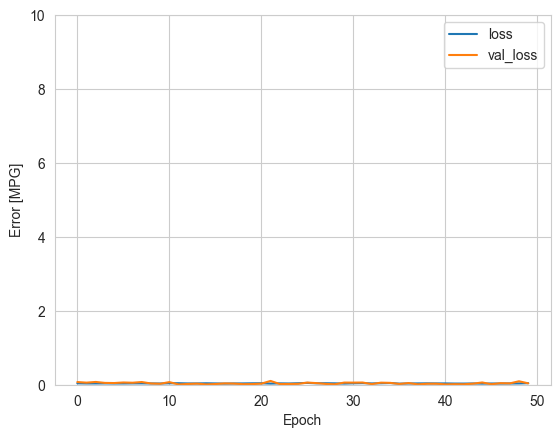

In [15]:
hist = pd.DataFrame(training_history.history)
hist['epoch'] = training_history.epoch
hist.tail()

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(training_history)